## Homework 01

## Koidala Surya Prakash
### Roll : EE18BTECH11026

In [2]:
# imports here!

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Order of elements: 

For every question,
The "CODE" section involves all the possible functions related to the whole question. 
The "Implementation" section takes in an image and performs the operation and outputs the results.

### Common code section

A class which involves methods to plot image , histogram and thresholded image(modal) implemented using OOP 

In [6]:
class image:                                             ## class for an image .. provides histogram, thresholding
    def __init__(self,path = None,img = None,plot = False,title = None):
        if(path!=None):
            self.img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        else :
            self.img = img
        self.h,self.w = np.shape(self.img)
        
        if(plot == 1):
            plt.title(title)
            plt.imshow(self.img,cmap = 'gray')
            plt.figure()
            
        
    def histogram(self,plot = False,title = "This is the Histogram"):
        hist = np.zeros(256)
        maxi = 0
        for i in range(self.h):
            for j in range(self.w):
                hist[self.img[i][j]] =hist[self.img[i][j]] +1 
                if(hist[self.img[i][j]] > maxi):
                    maxi = hist[self.img[i][j]] 
                    mode = self.img[i][j]
        self.mode = mode
        if(plot==1):
            x = range(256) 
            plt.title(title)
            plt.plot(x,hist)
            plt.figure(title)
        self.hist = hist
        

    def thresholded(self,plot):
        threshold = np.zeros((self.h, self.w))
        for i in range(self.h):
            for j in range(self.w):
                threshold[i][j] = (self.img[i][j] >= self.mode)*255
        self.threshold = threshold
        
        if(plot == True):
            plt.title("The thresholded image: Threshold = %d"% self.mode)
            plt.imshow(self.threshold,cmap = 'gray')
            plt.figure()
        return self.threshold


## Problem 1 : 

### Code : 



In [7]:

def valid(I,i,j):                                               # checks if index is valid for boundaries
    if(i>-1 and j > -1 and i < I.shape[0]and j < I.shape[1]):
        return True
    else:
        return False

def window(i,j,I,B):                                            # creates an array of window elements
    arr = []
    for k in range(B.shape[0]):
        if(valid(I,i+B[k][0],j+B[k][1])==True):
            arr.append(I[i+B[k][0]][j+B[k][1]] == 255)
    return np.array(arr)

def erode(I,B,plot = False,title = None):                                                 # Code for erosion
    E = np.zeros((I.shape[0],I.shape[1]),dtype=np.uint8)
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            arr = window(i,j,I,B)
            E[i][j]= (np.all(arr))*255
    if(plot == True):
        plt.title(title)
        plt.imshow(E,cmap = 'gray')
        plt.figure()
    return E

def dilate(I,B,plot = False,title = None):                              # Code for dilation
    D = np.zeros((I.shape[0],I.shape[1]),dtype=np.uint8)
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            arr = window(i,j,I,B)
            D[i][j]= np.any(arr)*255
    if(plot == True):
        plt.title(title)
        plt.imshow(D,cmap = 'gray')
        plt.figure()
    return D

def median(I,B,plot = False,title = None):                              # Code for median
    M = np.zeros((I.shape[0],I.shape[1]),dtype=np.uint8)
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            arr = window(i,j,I,B)
            M[i][j]= np.floor(np.median(arr))*255
    if(plot == True):
        plt.title(title)
        plt.imshow(M,cmap = 'gray')
        plt.figure()
    return M

def invert(I,plot = False,title = None):                                # Code for Inverting an image
    inv = np.zeros((I.shape[0],I.shape[1]),dtype=np.uint8)
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            inv[i][j]= (not(I[i][j]))*255 
    if(plot == True):
        plt.title(title)
        plt.imshow(inv,cmap = 'gray')
        plt.figure()
    return inv
    


## Implementation 

## Problem 1 : Window used Square[3]
### Setup

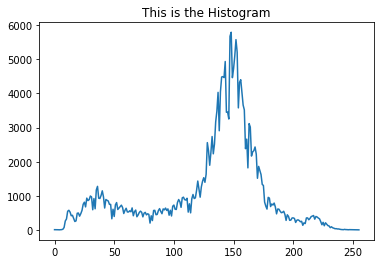

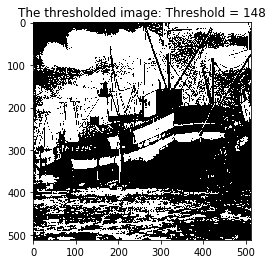

<Figure size 432x288 with 0 Axes>

In [8]:

Original =  image(path = 'misc/boat.512.tiff',plot = False)
Original.histogram(plot=True)
Threshold = Original.thresholded(plot = True)


## 1.1 Prooving Dilate is the dual of Erode
 Generated dilate(I) and (!(erode(!I)) and subtracting both gives a black image proves that both are equal.

Since it is a complete zero image , which implies that both are same !!


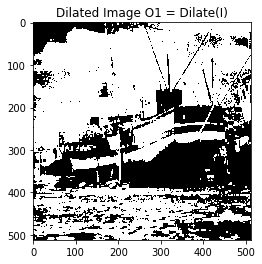

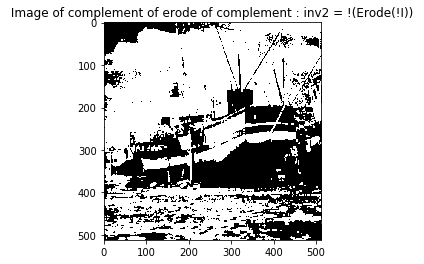

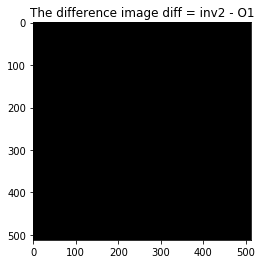

<Figure size 432x288 with 0 Axes>

In [9]:
B  = np.array([[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[1,-1],[-1,1],[-1,-1]]) # The window def Square[3]

O1 = dilate(Threshold,B,plot = True,title = "Dilated Image O1 = Dilate(I)")

inv1 = invert(Threshold,plot = False)
O2= erode(inv1,B,plot = False)
inv2= invert(O2,plot = True,title = " Image of complement of erode of complement : inv2 = !(Erode(!I)) ")
#################################################

## Proof that both are equal

diff = inv2 - O1
plt.title("The difference image diff = inv2 - O1")
plt.imshow(diff,cmap = 'gray')
plt.figure()

print("Since it is a complete zero image , which implies that both are same !!")

## 1.2 Prooving Erode is the dual of Dilate
 Generated erode(I) and (!(dilate(!I)) and subtracting both gives a black image proves that both are equal.

Since it is a complete zero image , which implies that both are same !!


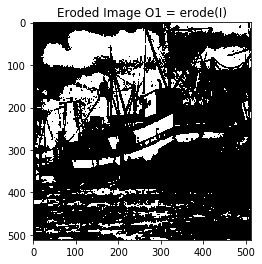

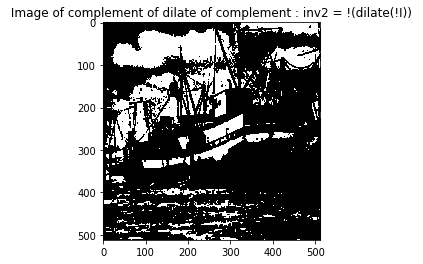

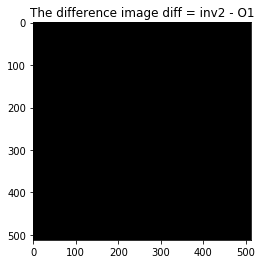

<Figure size 432x288 with 0 Axes>

In [22]:
B  = np.array([[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[1,-1],[-1,1],[-1,-1]]) # The window def Square[3]

O1 = erode(Threshold,B,plot = True,title = "Eroded Image O1 = erode(I)")

inv1 = invert(Threshold,plot = False)
O2= dilate(inv1,B,plot = False)
inv2= invert(O2,plot = True,title = " Image of complement of dilate of complement : inv2 = !(dilate(!I)) ")
#################################################

## Proof that both are equal

diff = inv2 - O1
plt.title("The difference image diff = inv2 - O1")
plt.imshow(diff,cmap = 'gray')
plt.figure()

print("Since it is a complete zero image , which implies that both are same !!")

## 1.3 Prooving median is the dual of median
 Generated median(I) and (!(median(!I)) and subtracting both gives a black image proves that both are equal.

Since it is a complete zero image , which implies that both are same !!


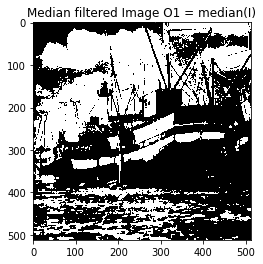

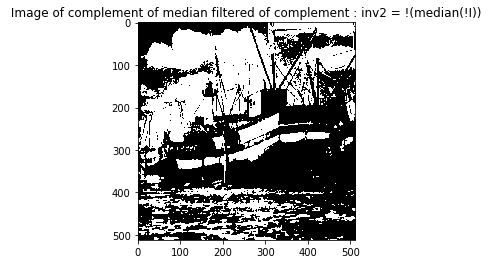

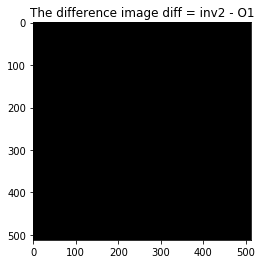

<Figure size 432x288 with 0 Axes>

In [23]:
B  = np.array([[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[1,-1],[-1,1],[-1,-1]]) # The window def Square[3]

O1 = median(Threshold,B,plot = True,title = "Median filtered Image O1 = median(I)")

inv1 = invert(Threshold,plot = False)
O2= median(inv1,B,plot = False)
inv2= invert(O2,plot = True,title = " Image of complement of median filtered of complement : inv2 = !(median(!I)) ")
#################################################

## Proof that both are equal

diff = inv2 - O1
plt.title("The difference image diff = inv2 - O1")
plt.imshow(diff,cmap = 'gray')
plt.figure()

print("Since it is a complete zero image , which implies that both are same !!")

# Problem 2 Gray Scale Operations
## Code for all parts is as follows :

In [79]:

def linear_transform(I,P,L,plot = False,title = None):
    J = np.array([[ max(0,min(255, int(I[i][j]*P) + L )) for j in range (I.shape[1])] for i in range(I.shape[0])],dtype = np.uint8)
    if(plot == True):
        plt.title("The Transformed image with P = %f, L = %f"%(P,L))
        plt.imshow(J,cmap = 'gray')
        plt.figure()
    return J        

def FSCS(I,plot = False,title = None):
    mini = np.amin(I) # value of the least element
    maxi = np.amax(I) # value of the highest element
    
    '''
    The mathematical expression for FSCS is :
    
    J[i][j] = { (I[i][j] - mini) / (maxi - mini) } * 255
    '''
    J = np.array( [[ (( (I[i][j] - mini)/ (maxi - mini) ) *255)    for j in range(I.shape[1]) ] for i in range(I.shape[0])]  ,dtype = np.uint8)
    
    if(plot == True):
        plt.title(title)
        plt.imshow(J,cmap = 'gray')
        plt.figure()
    return J


def log_compression(I,plot = False,title = None):
    J = np.array([[ int(np.log2(1+I[i][j])) for j in range (I.shape[1])] for i in range(I.shape[0])])           
    J = FSCS(J,plot = False)                      # log to the base 2
    if(plot == True):
        plt.title("The log compressed image")
        plt.imshow(J,cmap = 'gray')
        plt.figure()
    return J  

def hist_flatten(I,hist,title = None):
    h,w = I.shape
    for i in range(1,hist.size):              # converting hist to cumulative hist
        hist[i] = hist[i] + hist[i-1]
    for k in range(hist.size):
        if(hist[k]>0):
            h_min = hist[k]                  # finding h_min(least non-zero element in cumulative sum)
            
            break
    h_max = np.amax(hist)                    # finding h_max(highest element = h*w)
    
    T = np.array([( (hist[i] - h_min) / (h_max - h_min) )* 255 for i in range(hist.size)],dtype = np.uint8)
    # Converting T(transformed histogram whose elements describe the transformed intensity)
    J = np.array([[ T[I[i][j]] for j in range(I.shape[1])] for i in range(I.shape[0])] ,dtype = np.uint8)
    # Transformed image
    return J

## Implementation and results : 
### 2.1  Single linear point operations 
#### a) Scaling operation : J = PI : P = 1.5

image link :https://apod.nasa.gov/apod/image/1909/MoonJupiterPass_Hofer_960.jpg

Comments : The image's histogram has been scaled by 1.5 times.  Since P > 1 , it results in a brighter image, it also preserves the black pixels and at the same time increases the bright pixels intensity.

NameError: name 'linear_transform' is not defined

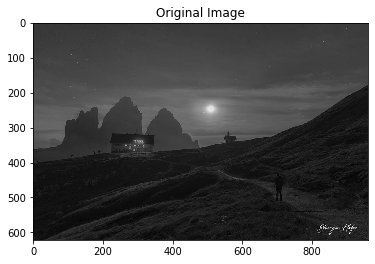

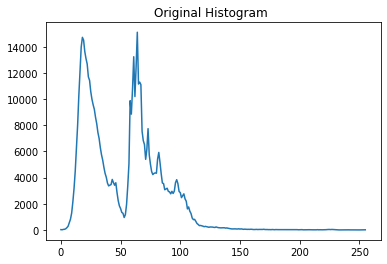

<Figure size 432x288 with 0 Axes>

In [5]:

Original =  image(path = 'MoonJupiterPass_Hofer_960.jpg',plot = True, title = "Original Image")
Original.histogram(plot=1,title = "Original Histogram ")
J = linear_transform (Original.img.copy(), P = 1.5, L = 0,plot = 0)

# Analysis of transformed image.
transformed = image(img = J, plot = True,title = "Transformed Image")
transformed.histogram(plot = 1,title = "Transformed Histogram")

#### b) Sliding Operation :  L = 50 (slides rightwards) 

The histogram has shifted towards right by L units.
Since L is positive the image gets more brightened. We increased the brightness , if L is negative it gets dimmer.

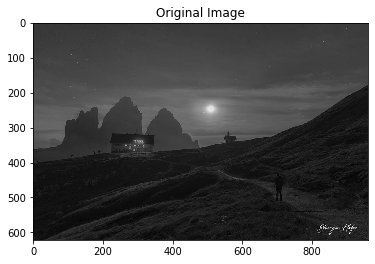

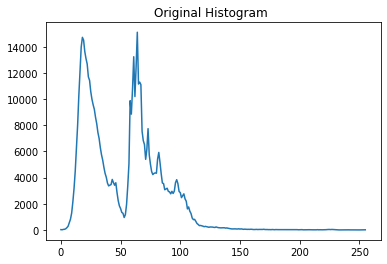

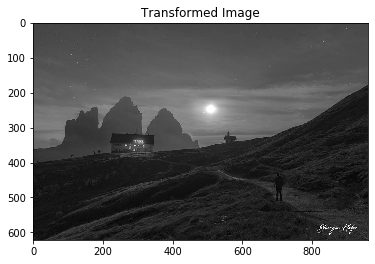

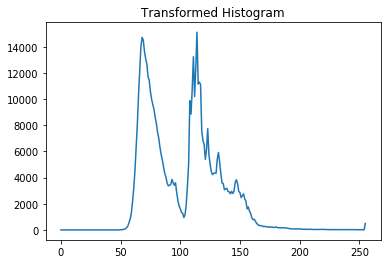

<Figure size 432x288 with 0 Axes>

In [53]:

Original =  image(path = 'MoonJupiterPass_Hofer_960.jpg',plot = True, title = "Original Image")
Original.histogram(plot=1,title = "Original Histogram ")
J = linear_transform (Original.img.copy(), P = 1, L = 50,plot = 0)

# Analysis of transformed image.
transformed = image(img = J, plot = True,title = "Transformed Image")
transformed.histogram(plot = 1,title = "Transformed Histogram")

### Problem 2.2  Full Scale Contrast Stretch :
#### Comments : After the transformation the histogram spans from [0,255]

Quality of the image : We can see that after transformation the histogram spams the whole [0,255] space , while in the first it spanned only [0,189].
This made the less bright pixels brighter in the image.


In a nutshell , it enhanced the contrast of the image by pushing the limits to the end. Thus making the contrast take its highest value.

The limits of the Original image is [0,189]
The limits of the FSCS image is [0,255]


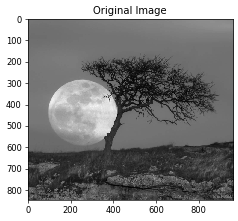

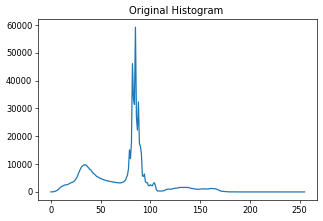

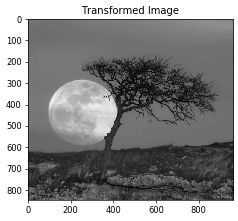

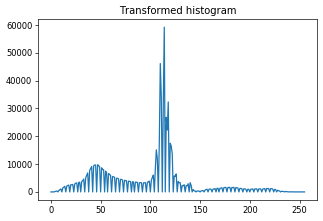

<Figure size 360x240 with 0 Axes>

In [99]:
'''
2.2 FSCS (Full Scale Contrast Scaling)
'''

Original =  image(path = 'MoonTree.jpg',plot = True, title = "Original Image")
Original.histogram(plot=1,title = "Original Histogram ")

F = FSCS(Original.img,plot = False)
scaled = image(img = F, plot = True,title = "Transformed Image")
scaled.histogram(plot = True, title = "Transformed histogram")


## Max & min limits before and after transformation  : 
print("The limits of the Original image is [%d,%d]"%(np.amin(Original.img),np.amax(Original.img)))
print("The limits of the FSCS image is [%d,%d]"%(np.amin(scaled.img),np.amax(scaled.img)))

### Problem 2.3  Log Magnitude Compression followed by FSCS :

image link: https://apod.nasa.gov/apod/ap191015.html

Comments : We can see that the intensities which are adjacent all have been matched to a single intensity, we can see the clusters in the sky.These almost lie in the same bin when we scaled it logarithmically.

log to the base "2" was used for scaling. Hence they are almost 9 bins(possible intensities) present in the output image.

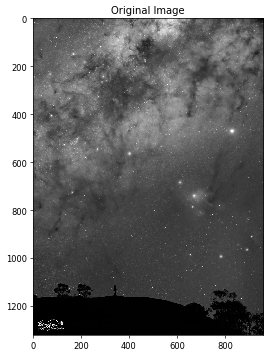

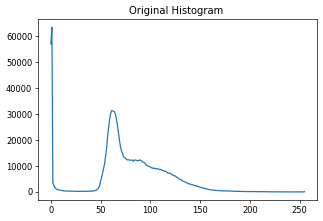

<Figure size 360x240 with 0 Axes>

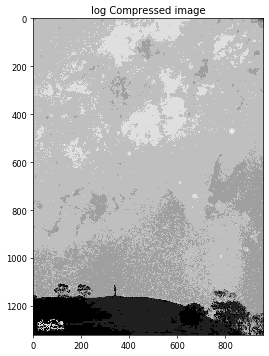

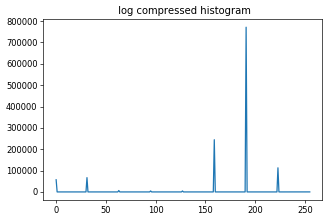

<Figure size 360x240 with 0 Axes>

In [88]:
plt.figure(figsize=(7,7))
Original =  image(path = 'MilkyWayAbove_Guerra_960.jpg',plot = True, title = "Original Image")
Original.histogram(plot=1,title = "Original Histogram ")

L = log_compression(Original.img,plot = False)
plt.figure(figsize=(7,7))
log_c = image(img = L,plot = True, title = "log Compressed image")
log_c.histogram(plot = True,title =" log compressed histogram" )


### Problem 2.4 : Histogram flattening
### Comments : More like FSCS but the cumulative frequency is considered here unlike intensity

Quality of the image : https://apod.nasa.gov/apod/ap191023.html

We can see that the original histogram has a straight drop at the high intensities, but the transformed image's histogram is more or less resembles a flattened histogram (the intensities are occuring almost at the same frequency) .  Hence this operation flattens the histogram. It enhanced the contrast of the image , we have more bright regions now.

In addition to that , this also results in increasing the contrast of the image.

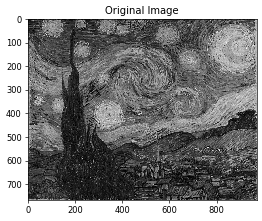

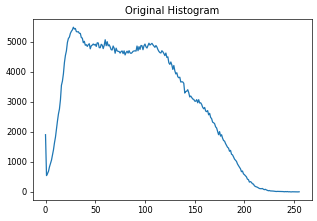

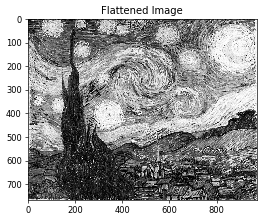

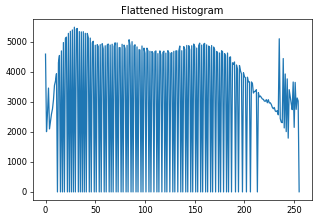

<Figure size 360x240 with 0 Axes>

In [84]:
Original =  image(path = 'StarryNight_VanGogh_970.jpg',plot = True, title = "Original Image")
Original.histogram(plot=True,  title = "Original Histogram")
    
J = hist_flatten(Original.img,Original.hist)
flattened = image(img =J,plot = True, title = "Flattened Image")
flattened.histogram(plot = True, title = "Flattened Histogram")

## Problem 03  - Zooming
### Code is as follows

link of the image : https://apod.nasa.gov/apod/ap191124.html

In [10]:

### Question 3.1 Nearest neighbours ...

def nearest_neighbour_zoom(I, factor ):  # Just finding the floor of the index/ factor and inserting the same intensity
    h,w = I.shape
    J_h,J_w = int(factor*h),int(factor*w)         # This is kind of having neighbouring values.
    
    J = np.array([[ I[int(i/factor)][int(j/factor)] for j in range(J_w)] for i in range(J_h)] ,dtype = np.uint8)
    return J

#### Question 3.2 Binary interpolation ... 

def valid(i,j,I):       ## Checks if i,j are inside the image,if yes we will include them in the matrix 
    if(i>-1 and i < I.shape[0] and j > -1 and j< I.shape[1]):
        return True
    return False


def MAP(i,j,img,factor):                     # This takes in i,j (the pixel to which intensity is to be found)
    A = []
    I = []                                  
    m,n = int(i/factor), int(j/factor)
    
    if(valid( m,n-1,img )):                 # Calculates its nearest neighbors in the original img    
        ti,tj = (m)*factor, (n-1)*factor    # insert its values in matrix for finding A,B,C,D
        A.append([ 1,ti,tj,ti*tj ])
        I.append([img[m][n-1]])

    if(valid( m,n+1,img )):
        ti,tj = (m)*factor, (n+1)*factor
        A.append([ 1,ti,tj,ti*tj ])
        I.append( [img[m][n+1]] )
        
    if(valid( m-1,n,img )):
        ti,tj = (m-1)*factor, (n)*factor
        A.append([ 1,ti,tj,ti*tj ])
        I.append([ img[m-1][n]] )
        
    if(valid( m+1,n,img )):
        ti,tj = (m+1)*factor, (n)*factor
        A.append([ 1,ti,tj,ti*tj ])
        I.append([img[m+1][n]])
        
    I = np.array(I)
    A = np.array(A)
    
    T = []
    T.append([1,i,j,i*j])
    T = np.array(T)
    C = np.linalg.pinv(A)@I                  ## finds C = A^-1 * I
    
    intensity = T @ C                        ##  J[i][j] =>  T * C 

    return intensity[0][0]
    
def Binary_interpolation_zoom(I,factor):
    h,w = I.shape
    J_h,J_w = int (factor*h),int (factor*w)
    J = np.array([[ MAP(i,j,I,factor)  for j in range(J_w)] for i in range(J_h)] ,dtype = np.uint8)
    return J

### Implementation
### a) Nearest neighbor:
Strategy : Considered a blank image of the size (Image * zoom factor) , traversed through each index , and mapped the intensities to the actual image intensity at indices (i/zoom factor, j/zoom factor).

 Comments : By this we can ensure that the rounded -scaled index always correspond to the nearest neighbor in the actual image.



Quality of the image : In this algorithm we are cloning the same pixel intensity of that of its closest neighbor,  hence we can observe that all the pixel intensities are exactly the same in the neighborhood . This might effect the smoothness of the zoomed image, we will suddenly shift to a different intensity based upon the approximation , hence we can find box like structures around the edges of the zoomed image, this occurs due to the sudden change from high to low at the edges. Nevertheless the clarity of the image is very good, but it is not smooth enough.

Computation cost : This is a naive algorithm which does not require much calculations , we are just picking the intensity of the downsampled index, hence its very fast. It takes a complexity of O(m*n), m being rows and n being cols.

(774, 960)


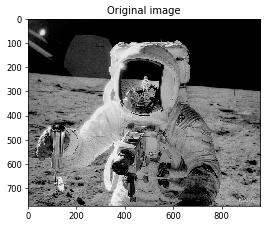

<Figure size 360x240 with 0 Axes>

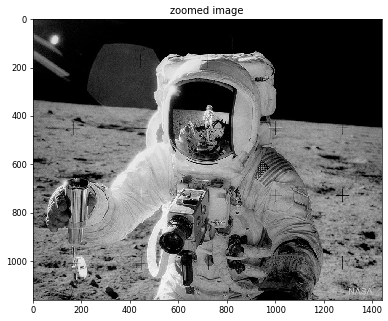

<Figure size 360x240 with 0 Axes>

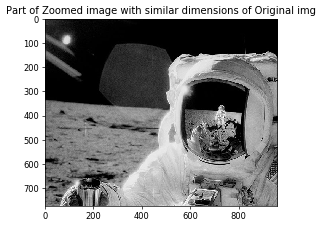

In [11]:
plt.rcParams['figure.dpi'] = 60

plt.figure(figsize=(5,5))
Original =  image(path = 'BeanConrad_Apollo12_960.jpg',plot =True, title = "Original image" )
J1 = nearest_neighbour_zoom(Original.img,1.5)
plt.figure(figsize=(7.5,7.5))
image(img =J1,plot = True, title = 'zoomed image')

print(Original.img.shape)
Output = J1[0:Original.img.shape[0],0:Original.img.shape[1]]
plt.figure(figsize=(5,5))
plt.title("Part of Zoomed image with similar dimensions of Original img")
plt.imshow(Output,cmap = "gray")


### b) Binary interpolation : 

#### Strategy : 


### Implementation : 

Comments

Quality of the image : Pixel intensities are bi-linerly dependent upon its position and also the intensities of its neighborhood. This results in a smooth transition between intensities as we move across the pixels.  The image seems to have been blurred(to a smaller extent) which indeed infers that it is a smoothened image unlike the Nearest neighbours algorithm. 

Computation Cost : Unlike Nearest neighbors algorithm , bi-linear interpolation requires to perform tasks like "matrix inversion" , "matrix multiplication" for every pixel . This takes a lot of computation power when compared to the former algorithm.

(774, 960)


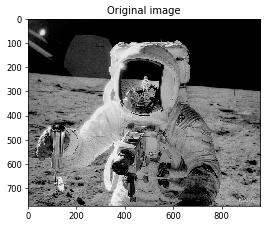

<Figure size 360x240 with 0 Axes>

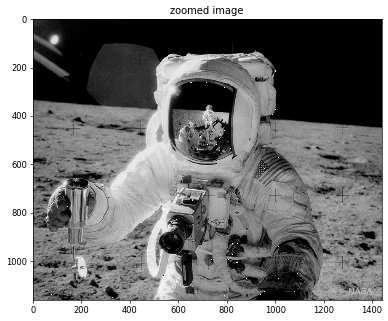

<Figure size 360x240 with 0 Axes>

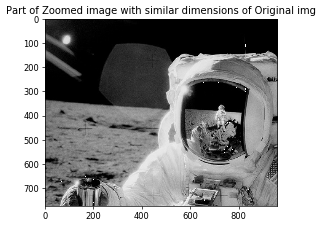

In [76]:
plt.rcParams['figure.dpi'] = 60

plt.figure(figsize=(5,5))
Original =  image(path = 'BeanConrad_Apollo12_960.jpg',plot =True, title = "Original image" )
J1 = Binary_interpolation_zoom(Original.img,1.5)
plt.figure(figsize=(7.5,7.5))
image(img =J1,plot = True, title = 'zoomed image')

print(Original.img.shape)
Output = J1[0:Original.img.shape[0],0:Original.img.shape[1]]
plt.figure(figsize=(5,5))
plt.title("Part of Zoomed image with similar dimensions of Original img")
plt.imshow(Output,cmap = "gray")


## The End
